# Assignment 1 - NumPy

**Name: Hamza Raqeeb**

**Id: 21031287**

In [1]:
#importing all the standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
# cheked the available sampe data files in the working directory
# classification: class2.csv
# regression: regr2.csv

import os
os.chdir("D:/study/tutorialPoint/Questions-6017941010")

class_file_name = "class2.csv"
regr_file_name  = "regr2.csv"

# KNN Classification

In [3]:
# Below code is function for k-means classification

def knn_classify(train, test, k):
    kmeans = KMeans(k)
    kmeans.fit(train)
    identified_clusters = kmeans.fit_predict(test)
    return identified_clusters

def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector1-vector1, 2)))

In [4]:
# function for Class split for X & Y

def X_Y_split(Data):
    x_class = class_data.iloc[:,1:3] # 1t for rows and second for columns
    print(x_class.head(5))
    y_class = class_data.iloc[:,0]
    print(y_class.head(5))
    return x_class, y_class

In [5]:
from sklearn.model_selection import train_test_split

# Function for Train val test split
def train_val_test_split(x_class, y_class):
    X_train, X_test, y_train, y_test = train_test_split(x_class, y_class, 
                                                        test_size=0.2, shuffle = True, random_state = 8)
    # Use the same function above for the validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                      test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2
    print("length of X training set", len(X_train))
    print("length of X validation set", len(X_val))
    print("length of X testing set", len(X_test))
    print("length of Y training set", len(y_train))
    print("length of Y validation set", len(y_val))
    print("length of Y testing set", len(y_test))
    
    return X_train, y_train, X_val, y_val, X_test, y_test

     y    x1    x2
0  4.0  3.67  8.99
1  3.0  2.18  3.06
2  3.0  2.77  4.41
3  2.0  9.81  7.19
4  3.0  0.68  2.24
     x1    x2
0  3.67  8.99
1  2.18  3.06
2  2.77  4.41
3  9.81  7.19
4  0.68  2.24
0    4.0
1    3.0
2    3.0
3    2.0
4    3.0
Name: y, dtype: float64
length of X training set 120
length of X validation set 40
length of X testing set 40
length of Y training set 120
length of Y validation set 40
length of Y testing set 40

Cluster for each data point can predicted is:
 [2 0 0 0 1 0 2 0 1 2 2 2 1 1 1 0 2 1 1 2 2 0 2 2 2 2 0 2 1 1 0 0 1 1 1 0 2
 0 0 2]


D:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

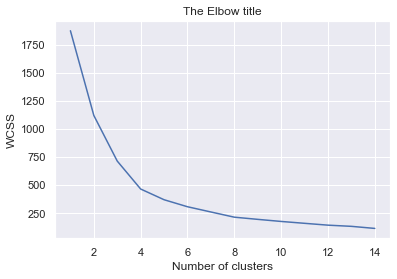

In [6]:
#In the below code first the classification is done for a random value that is 3, then comparison of wcss value of multiple cluster values upto 15 is done to find optimal number of clusters which comes out to be 4

class_data = pd.read_csv(class_file_name)
print(class_data.head(5))

# X & Y split of dataset
x_class, y_class = X_Y_split(class_data)

X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(x_class, y_class)

# Calling classification function
label = knn_classify(X_train, X_val, 3)
print('\nCluster for each data point can predicted is:\n', label)

wcss=[]
cluster_count = 15
for i in range(1,cluster_count):
    kmeans = KMeans(i)
    kmeans.fit(X_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,cluster_count)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [7]:
#Optimal Cluster count = 4 for the dataset validation set
label = knn_classify(X_train, X_val, 4)
print('\nUpdated cluster for each validation data point can predicted is:\n', label)


Updated cluster for each validation data point can predicted is:
 [3 0 3 0 2 3 1 3 2 1 1 1 3 2 2 3 3 2 2 1 1 3 1 1 1 1 0 1 2 2 0 3 2 2 2 3 1
 0 0 1]


In [8]:
#Optimal Cluster count = 4 for the dataset validation set
label = knn_classify(X_train, X_test, 4)
print('\nCluster for each test data point can predicted is:\n', label)


Cluster for each test data point can predicted is:
 [2 2 0 1 1 1 1 1 3 0 0 1 1 0 1 2 2 3 0 2 3 1 0 2 1 2 2 2 0 0 2 3 3 2 1 2 3
 3 1 2]


# Part 2- KNN and Linear regression

### KNN Regression

In [9]:
# defining function for X & Y for dataframe splitting and for KNN regression
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

def datasplit(train, test):
    col = len(train.columns) 
    train_X = train.iloc[:,1:col]
    train_y= train.iloc[:,0]
    test_X = test.iloc[:,1:col]
    test_y = test.iloc[:,0]
    return train_X, train_y, test_X, test_y

def error(actual, predicted):
    MSE = np.square(np.subtract(actual,predicted)).mean()
    RMSE = sqrt(MSE)
    return RMSE

def knn_regression(train, test, k):
    train_X, train_y, test_X, test_y = datasplit(train, test)
    knn_model.fit(train_X, train_y)
    test_preds = knn_model.predict(test_X)
    mse = mean_squared_error(test_y, test_preds)
    rmse = sqrt(mse)
    return test_preds, rmse

In [10]:
# redaing file as array
data = pd.read_csv(class_file_name).to_numpy()

In [11]:
# validation value prediction and RMSE
valpred, val_rsme = knn_regression(X_train, X_val, 4)
print(valpred)
print(val_rsme)

[6.30333333 4.42333333 5.39666667 1.15666667 4.92666667 3.65
 2.23       4.29333333 9.21       3.65       6.31333333 4.63666667
 7.77666667 4.36       5.04333333 5.05666667 5.59666667 4.36
 3.65333333 6.31333333 6.27333333 5.59666667 6.97       5.59666667
 6.19333333 5.77       7.21       1.15666667 5.84333333 4.96666667
 5.77       5.62666667 4.49666667 4.49666667 3.90333333 2.88666667
 7.21       4.63666667 5.84       3.19333333]
3.539192272884372


In [12]:
# Test value prediction and RMSE
testpred_knn, test_rsme_knn = knn_regression(X_train, X_test, 4)
print('Predicted values of the given test data using KNN regression:', testpred_knn)
print('Root mean sq value for the given test data using KNN regression:', test_rsme_knn)

Predicted values of the given test data using KNN regression: [3.73666667 4.33       3.62       4.03       5.15666667 5.77
 6.42       5.4        6.42666667 6.29333333 6.38666667 5.15666667
 4.03       4.96666667 3.05333333 4.03       5.58333333 4.79666667
 3.42333333 2.88666667 7.88666667 5.26333333 4.48333333 5.59666667
 6.91333333 4.03       5.15666667 3.73666667 6.08       6.02666667
 4.29333333 6.86666667 2.78666667 6.97       5.71666667 4.61
 4.73       4.36       5.05666667 4.63666667]
Root mean sq value for the given test data using KNN regression: 3.240237088376233


### Linear Regression

In [13]:
# defining function for X & Y for array splitting and for linear regression analysis

def arrsplit(train, test): #X & Y array splitting
    train_X = train[:, [1,2]]
    train_y = train[:, [0]]
    test_X = test[:, [1,2]]
    test_y = test[:,[0]]
    return train_X, train_y, test_X, test_y

def normal_equation(X, Y): #Linear regression analysis
    X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X, Y)
    a = np.linalg.inv(np.dot(X_train.T,X_train))
    b = np.dot(X_train.T,y_train)
    beta = np.dot(a,b)
    return beta

def predict(test,beta): #value prediction function
    return np.dot(test,beta)

def rmse_val(actual_test, predicted_test): #Root mean square value function
    rmse = error(actual_test, predicted_test)
    return rmse

In [14]:
# reading the dataset, splitting the data into X & Y and then applying various functions to calculate the RMSE value for the predcited and actual outputs
x_class, y_class = X_Y_split(data)

beta = normal_equation(x_class, y_class)
test_op  = predict(X_test, beta)
rmse_lin = rmse_val(y_test, test_op)
print("Array of resultant output for validation data:\n",test_op)
print("Root mean Squared error for the linear regression model is:", rmse)

     x1    x2
0  3.67  8.99
1  2.18  3.06
2  2.77  4.41
3  9.81  7.19
4  0.68  2.24
0    4.0
1    3.0
2    3.0
3    2.0
4    3.0
Name: y, dtype: float64
length of X training set 120
length of X validation set 40
length of X testing set 40
length of Y training set 120
length of Y validation set 40
length of Y testing set 40
Array of resultant output for validation data:
 [2.08573    0.15041177 3.0122209  1.62364889 1.97032903 1.32326508
 2.91305654 2.59348682 3.38593521 3.17648203 3.25838691 1.86146834
 1.66644637 4.05482943 1.4663385  1.53482772 2.2250423  3.80165928
 4.44947131 1.03007662 4.77440687 2.0053859  3.66760428 2.16853027
 0.93057375 1.5711874  1.86972403 2.13901581 3.84518503 3.12514676
 2.18832214 3.46908648 4.55652874 0.87445148 2.08432685 1.2051646
 3.70870187 4.91769865 2.59422026 0.673956  ]


NameError: name 'rmse' is not defined

# Analysing the results for Linear and KNN regression

In [ ]:
print('Knn regression error value is:',test_rsme_knn)
print('linear regression error value is:',rmse_lin)

As we can compare the two regression methodologies, the linear regression have a lower residual sum of squares, so Linear rregression is better